In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
%cd /content/drive/MyDrive/Fruit_Recognizer

/content/drive/MyDrive/Fruit_Recognizer


In [59]:
!pip install -Uqq fastai gradio nbdev

In [60]:
from fastai.vision.all import *
from fastai.vision.all import load_learner
import gradio as gr

In [61]:
model=load_learner("models/fruit_model_v6.pkl")

In [62]:
fruit_labels = ('Apple', 'Apricot', 'Avocado',
                'Banana', 'Blueberry',
                'Carambola', 'Cherry', 'Fig',
                'Grape', 'Kiwi', 'Lemon',
                'Lychee', 'Mango',
                'Orange', 'Papaya',
                'Pear', 'Pineapple',
                'Raspberry', 'Strawberry', 'Watermelon')


def recognize_image(image):
  pred, idx, probs = model.predict(image)
  print(pred)
  return dict(zip(fruit_labels, map(float, probs)))

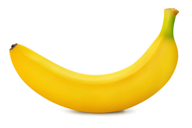

In [63]:
img = PILImage.create(f'test_images/test_0.jpg')
img.thumbnail((192,192))
img

In [64]:
recognize_image(img)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


Banana


{'Apple': 5.5752518157703435e-09,
 'Apricot': 2.5855018126463847e-10,
 'Avocado': 4.064226999389575e-08,
 'Banana': 0.9999983310699463,
 'Blueberry': 5.352696064164775e-09,
 'Carambola': 1.3467055737237388e-07,
 'Cherry': 7.743841479168623e-08,
 'Fig': 1.3441150770177046e-07,
 'Grape': 1.305619701241767e-08,
 'Kiwi': 1.0617771550869293e-08,
 'Lemon': 7.528898890996061e-07,
 'Lychee': 1.645614133849449e-08,
 'Mango': 7.693946457720813e-08,
 'Orange': 2.524078865917545e-07,
 'Papaya': 5.074594255916054e-08,
 'Pear': 1.430123717227616e-07,
 'Pineapple': 9.21994214309052e-08,
 'Raspberry': 8.419928754221928e-09,
 'Strawberry': 2.021719680556089e-09,
 'Watermelon': 1.9477317536598093e-09}

In [65]:
import gradio as gr

image = gr.Image()
label = gr.Label()
examples = [
    'test_images/test_0.jpg',
    'test_images/test_1.jpg',
    'test_images/test_2.jpg',
    'test_images/test_4.jpeg'
]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://64643211b6c5ebf0bf.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
